In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [6]:
import pathlib
from pathlib import Path
training_data_path = Path(r"C:\Users\Stavros\.keras\datasets\training-set")

validation_data_path = Path(r"C:\Users\Stavros\.keras\datasets\validation-set")
test_data_paths = Path(r"C:\Users\Stavros\.keras\datasets\test-set")


num_tr = len(os.listdir(training_data_path))
num_val = len(os.listdir(validation_data_path))

num_test = len(os.listdir(test_data_paths))

In [15]:
import pandas as pd
df = pd.read_excel('Desktop/train_concepts.xlsx')
df.head(3)
#i have separate the first tag from the image id and i have sort the image id column

,image,tag1,tag2,tag3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
0,ROCO_CLEF_00000,C0027442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ROCO_CLEF_00001,C0741302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ROCO_CLEF_00003,C0040399,C2936859,C0796095,C0751438,C2936904,C0020889,C0796110,C0019939,C2826624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfstr = pd.read_csv('Desktop/string_concepts.csv',header=None)
dfstr['tags'], dfstr['disease'] = dfstr[0].str.split('\t', 1).str
dfstr.shape

(5528, 3)

In [45]:
classes=dfstr['tags'] #taking all the tags

In [93]:
len(classes)

5528

In [28]:

dfl=df.to_csv(header=None, index=False).strip('\n').split('\n') #train tags

In [97]:
len(dfl)

56629

In [29]:
dfl = pd.DataFrame(np.array(dfl).reshape(56629,1))

In [30]:
dfl.head(5)

,0
0,"C0027442,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
1,"C0741302,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
2,"C0040399,C2936859,C0796095,C0751438,C2936904,C..."
3,"C0687028,C1261287,C1550227,,,,,,,,,,,,,,,,,,,,..."
4,"C0772294,C0221198,C0441633,,,,,,,,,,,,,,,,,,,,..."


In [17]:

df2=df['image']

In [20]:
df=df.drop(columns=['image'])


In [136]:
dfl.head(5)

,0
0,"C02742,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
1,"C0741302,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
2,"C04039,C2936859,C0796095,C0751438,C2936904,C02..."
3,"C0687028,C1261287,C15027,,,,,,,,,,,,,,,,,,,,,,..."
4,"C07294,C02198,C04163,,,,,,,,,,,,,,,,,,,,,,,,,,..."


In [31]:
min_threshold_rep = 1
dfl[0] = dfl[0].str.replace(r'(\w)\1{%d,}'%(min_threshold_rep-1), r'\1')

In [99]:
df2.shape

(56629, 1)

In [33]:
result = pd.concat([df2, dfl], axis=1, sort=False) #merging the image df and the tags df

In [34]:
result

,image,0
0,ROCO_CLEF_00000,"C02742,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
1,ROCO_CLEF_00001,"C0741302,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
2,ROCO_CLEF_00003,"C04039,C2936859,C0796095,C0751438,C2936904,C02..."
3,ROCO_CLEF_00004,"C0687028,C1261287,C15027,,,,,,,,,,,,,,,,,,,,,,..."
4,ROCO_CLEF_00005,"C07294,C02198,C04163,,,,,,,,,,,,,,,,,,,,,,,,,,..."
5,ROCO_CLEF_00007,"C0817096,C03248,C15467,,,,,,,,,,,,,,,,,,,,,,,,..."
6,ROCO_CLEF_00008,"C170931,C041618,C05949,C01581,C0751438,C048475..."
7,ROCO_CLEF_00009,"C015392,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
8,ROCO_CLEF_00011,"C02939,C030797,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
9,ROCO_CLEF_00013,"C0598782,C0392148,C0240795,C056030,C15386,C070..."


In [38]:
result['tags']=result['tags'].apply(lambda x:x.split(","))

In [43]:
result.columns = ['image', 'tags']
result.head(5)

,image,tags
0,ROCO_CLEF_00000,"[C02742, , , , , , , , , , , , , , , , , , , ,..."
1,ROCO_CLEF_00001,"[C0741302, , , , , , , , , , , , , , , , , , ,..."
2,ROCO_CLEF_00003,"[C04039, C2936859, C0796095, C0751438, C293690..."
3,ROCO_CLEF_00004,"[C0687028, C1261287, C15027, , , , , , , , , ,..."
4,ROCO_CLEF_00005,"[C07294, C02198, C04163, , , , , , , , , , , ,..."


In [71]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)
train_generator=datagen.flow_from_dataframe(
dataframe=result,
directory=training_data_path,
x_col="image",
y_col="tags",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
classes=classes,
target_size=(32,32))

Found 38386 validated image filenames belonging to 5528 classes.


In [47]:
classes=classes.tolist()

In [49]:
def append_ext(fn):
    return fn+".jpg"
result["image"]=result["image"].apply(append_ext)


In [52]:
import pandas as pd
dfv = pd.read_csv('Desktop/val_concepts.csv')
dfv.head(3)
#i have separate the first tag from the image id and i have sort the image id column

,image,tags
0,ROCO_CLEF_64017,C0001074;C3203359;C0041618
1,ROCO_CLEF_39073,C0027530;C1610719;C0065967;C1704258;C0883242;C...
2,ROCO_CLEF_18028,C1265876;C1293134;C0029053;C0034579;C0025066;C...


In [53]:
dfv["image"]=dfv["image"].apply(append_ext)

In [70]:
valid_generator=test_datagen.flow_from_dataframe(
dataframe=dfv,
directory=validation_data_path,
x_col="image",
y_col="tags",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
classes=classes,
target_size=(32,32))

Found 14157 validated image filenames belonging to 5528 classes.


In [56]:
dfv['tags']=dfv['tags'].apply(lambda x:x.split(";"))

In [100]:
valid_generator

In [74]:
#creating the model



from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5528, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [75]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [76]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
1199/1199 [==============================] - 548s 457ms/step - loss: 12.7035 - accuracy: 0.0711 - val_loss: 67.2996 - val_accuracy: 0.0059
Epoch 2/10
1199/1199 [==============================] - 334s 279ms/step - loss: 12.5099 - accuracy: 0.0871 - val_loss: 72.4014 - val_accuracy: 0.0055
Epoch 3/10
1199/1199 [==============================] - 327s 272ms/step - loss: 12.9270 - accuracy: 0.0848 - val_loss: 67.0451 - val_accuracy: 0.0049
Epoch 4/10
1199/1199 [==============================] - 329s 274ms/step - loss: 13.6088 - accuracy: 0.0822 - val_loss: 83.4345 - val_accuracy: 0.0041
Epoch 5/10
1199/1199 [==============================] - 337s 281ms/step - loss: 15.8628 - accuracy: 0.0804 - val_loss: 77.5561 - val_accuracy: 0.0038
Epoch 6/10
1199/1199 [==============================] - 326s 272ms/step - loss: 22.6344 - accuracy: 0.0805 - val_loss: 127.7631 - val_accuracy: 0.0055
Epoch 7/10
1199/1199 [==============================] - 333s 278ms/step - loss: 54.1164 - accuracy:

In [78]:
dft = pd.read_excel('Desktop/test1.xlsx',header=None) #an excel file with the test filenames
dft = dft.rename(columns={0: 'image'})
dft.head(5)

,image
0,ROCO_CLEF_TEST_00001.jpg
1,ROCO_CLEF_TEST_00002.jpg
2,ROCO_CLEF_TEST_00003.jpg
3,ROCO_CLEF_TEST_00004.jpg
4,ROCO_CLEF_TEST_00005.jpg


In [79]:
test_datagen=ImageDataGenerator(rescale=1./255.)


test_generator=test_datagen.flow_from_dataframe(
dataframe=dft,
directory=test_data_paths,
x_col="image",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(32,32))

Found 10000 validated image filenames.


In [131]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_TEST) #accuracy score

[59971.6953125, 0.00010016025771619752]

In [82]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

312/312 [==============================] - 66s 211ms/step


In [83]:
predicted_class_indices=np.argmax(pred,axis=1)

In [91]:
predicted_class_indices

array([4840, 4840, 4840, ..., 2574, 2294, 2574], dtype=int64)

In [85]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [89]:
len(test_generator.filenames)

10000

In [109]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

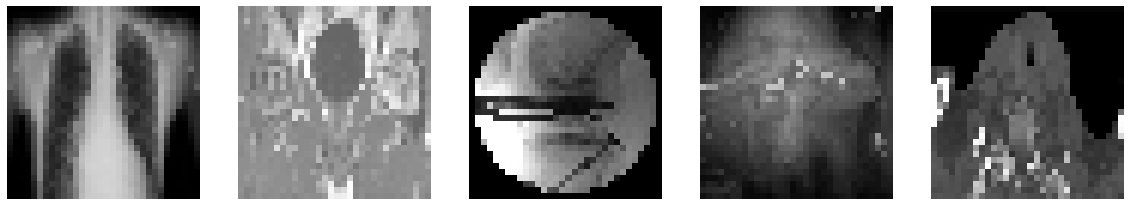

In [103]:
#plotting some images

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')

sample_training_images, _ = next(train_generator)
plot_images(sample_training_images[:5])

In [114]:
len(predictions)

10000

In [127]:
len(valid_generator.classes)

14157

In [147]:
pred=model.predict_generator(generator=valid_generator,
steps=STEP_SIZE_TEST) 

In [149]:
pred

array([[0.00014628, 0.00014594, 0.0001463 , ..., 0.00015908, 0.00015952,
        0.00014631],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00014628, 0.00014594, 0.0001463 , ..., 0.00015908, 0.00015952,
        0.00014631],
       ...,
       [0.00014628, 0.00014594, 0.0001463 , ..., 0.00015908, 0.00015952,
        0.00014631],
       [0.00014628, 0.00014594, 0.0001463 , ..., 0.00015908, 0.00015952,
        0.00014631],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)